# Projeto Titanic em português para brasileiros
## 1 Introdução

__Dados coletados:__ Foram enviados dois arquivos, um contendo um conjunto de dados com informações de 936 passageiros (train.csv) e um para testes, contendo os dados de 418 passageiros(test.csv). O primeiro possui uma coluna que nos informa se o passageiro sobreviveu ou não, no segundo esta coluna deve ser prevista com o algoritmo proposto.

## 2 Primeiro contato com os dados
### 2.1 Importar bibliotecas e dados
O código foi inteiramente escrito em Python 3, usaremos algumas bibliotecas muito conhecidas na área de Ciência de dados:
- Numpy para matrizes multidimensionais
- Pandas para manipulação e análise de dados
- Matplotlib e Seaborn para visualização de dados
- Scikit-learn para modelos de Machine Learning

Os dados foram importados em duas variáveis: Treino, referente ao primeiro arquivo, e Teste, referente ao segundo.
Colunas renomeadas para melhorar a leitura e para padronizar ambos os arquivos.

In [1]:
#Importando Bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Importando os dados para as variáveis= pd.readcsv("../input/train.csv")
treino =  pd.read_csv('train.csv')
teste =  pd.read_csv('test.csv')

#Colunas Renomeadas
treino = treino.rename(columns={'passengerid': 'Passengerid', 'survived': 'Survived', 'pclass': 'Pclass', 'name':'Name', 'sex': 'Sex', 'age': 'Age', 'sibsp': 'Sibsp', 'parch':'Parch','ticket': 'Ticket', 'fare':'Fare', 'cabin': 'Cabin', 'embarked': 'Embarked'})

#Lista que contém nossas matrizes
todosdados = [treino,teste]

### 2.2 Conhecendo os dados
Em nossas colunas teremos as váriaveis descritas a seguir:

Survived:
  * Se o passageiro sobreviveu ou não
  * Valores possíveis:
    0 = Não
    1 = Sim

Pclass:
  * classe da Passagem no navio
  * Valores possíveis:
    1 = primeira classe,
    2 = classe executiva,
    3 = classe econômica

Sex:
  * O gênero do passageiro

Age:
  * Idade em anos

SibSp
  * Número de irmaos/companheiros dentro do navio

Parch:
  * Número de parentes e filhos no navio

Ticket:
  * Código da passagem

Fare:
  * Valor da passagem

Cabin:
  * Número da cabine

Embarked:
  * Local onde embarcou no Titanic
  * Possíveis valores: 
    C = Cherbourg,
    Q = Queenstown,
    S = Southampton

In [2]:
#Colunas e informações sobre o arquivo Treino
print(treino.columns)
print('_'*60)
print(treino.head(5))
print('_'*60)
print(treino.tail(5))
print('_'*60)
print(treino.shape)

Index(['Passengerid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
____________________________________________________________
   Passengerid  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name      Sex   Age  Sibsp  \
0                            Braund, Mr. Owen Harris     male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  Female   38.0      1   
2                             Heikkinen, Miss. Laina    women  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female_  35.0      1   
4                           Allen, Mr. William Henry     male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN      

In [3]:
#Colunas e informações sobre o arquivo Teste
print(teste.columns)
print('_'*60)
print(teste.head(5))
print('_'*60)
print(teste.tail(5))
print('_'*60)
print(teste.shape)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
____________________________________________________________
   PassengerId  Pclass   ...    Cabin Embarked
0          892       3   ...      NaN        Q
1          893       3   ...      NaN        S
2          894       2   ...      NaN        Q
3          895       3   ...      NaN        S
4          896       3   ...      NaN        S

[5 rows x 11 columns]
____________________________________________________________
     PassengerId  Pclass   ...    Cabin Embarked
413         1305       3   ...      NaN        S
414         1306       1   ...     C105        C
415         1307       3   ...      NaN        S
416         1308       3   ...      NaN        S
417         1309       3   ...      NaN        C

[5 rows x 11 columns]
____________________________________________________________
(418, 11)


In [3]:
#Colunas e informações sobre o arquivo Teste
print(treino.columns.values)
print('_'*60)
treino.info()
print('_'*60)
teste.info()

['Passengerid' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'Sibsp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  936 non-null    int64  
 1   Survived     936 non-null    int64  
 2   Pclass       927 non-null    float64
 3   Name         936 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          748 non-null    float64
 6   Sibsp        936 non-null    int64  
 7   Parch        936 non-null    int64  
 8   Ticket       936 non-null    object 
 9   Fare         936 non-null    float64
 10  Cabin        210 non-null    object 
 11  Embarked     934 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 87.9+ KB
____________________________________________________________
<class 'pandas.

In [4]:
#Dados estatísticos para análise de colunas numéricas
treino.describe()

,Passengerid,Survived,Pclass,Age,Sibsp,Parch,Fare
count,936.000000,936.000000,927.000000,748.000000,936.000000,936.000000,936.000000
mean,446.438034,0.384615,2.314995,29.777634,0.519231,0.375000,31.647288
std,258.429453,0.486764,0.836545,15.842432,1.092343,0.796634,48.700700
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,672.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,194.000000,8.000000,6.000000,512.329200


In [5]:
#Dados estatísticos para análise de colunas com texto
treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,936,890,936,210,934
unique,891,12,681,147,3
top,"Attalah, Mr. Sleiman",male,347088,B96 B98,S
freq,2,144,8,4,676


In [6]:
#Quantidade de dados faltando em cada coluna do arquivo treino
treino.isnull().sum()

Passengerid      0
Survived         0
Pclass           9
Name             0
Sex             46
Age            188
Sibsp            0
Parch            0
Ticket           0
Fare             0
Cabin          726
Embarked         2
dtype: int64

## 3 Limpeza e correção de dados

### 3.1 Limpando e completando a coluna _Age_
Para alguns algorítmos de Machine Learning (aprendizado de máquina) a falta de dados faz com que o modelo falhe, e para melhor visualização é preferível que estes estejam limpos. Nas vizualizações acima é possível perceber que existem dados faltando, assim como dados _sujos_. Portanto, é importante que estes sejam corrigidos.
Na coluna _Age_, temos dados faltando e ainda _outliers_ (dados absurdos), completaremos e retiraremos estes.

_"O preenchimento dos botes salva-vidas começou por volta dàs 0h20min. O segundo oficial Lightoller se dirigiu ao capitão e sugeriu que a evacuação fosse iniciada com as mulheres e crianças. Smith, ainda em estado de paralisia, concordou com a cabeça e disse "coloque as mulheres e crianças e abaixe-os". Lightoller assumiu o lançamento dos botes no lado bombordo enquanto Murdoch ficou encarregado do lado estibordo. Entretanto, os dois homens interpretaram as ordens de maneira diferente: o primeiro oficial entendeu que eram mulheres e crianças primeiro, enquanto o segundo oficial presumiu que eram mulheres e crianças apenas. Dessa forma, Lightoller lançava seus botes caso não houvesse nenhuma mulher por perto para embarcar, enquanto Murdoch por sua vez permitia a entrada de homens depois de embarcadas todas as mulheres e crianças. Nenhum dos dois sabia a capacidade exata dos barcos e temeram superlotá-los, assim vários botes foram abaixados com menos da metade de sua capacidade total."_

-7.0
65.0
-6.0
66.0
-29.374999999999996
70.425
-38.974999999999994
86.425


,Passengerid,Survived,Pclass,Age,Sibsp,Parch,Fare
count,638.000000,638.000000,630.000000,638.000000,638.000000,638.000000,638.000000
mean,448.987461,0.363636,2.428571,28.091301,0.493730,0.398119,18.996244
std,263.617301,0.481423,0.741980,13.293027,0.953779,0.843181,14.193592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,210.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,443.500000,0.000000,3.000000,27.500000,0.000000,0.000000,13.000000
75%,683.750000,1.000000,3.000000,36.000000,1.000000,0.000000,26.286450
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,69.300000


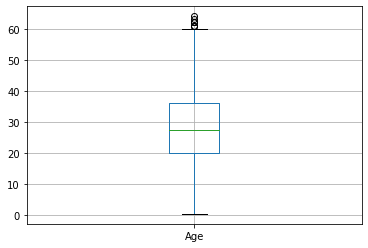

In [7]:
#treino.plot(kind='scatter', x='Age', y='Passengerid', rot=70)
#Removendo outlier por Interquartile range : https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

def remove_outlier(dataset, nome_col):
    q1 = dataset[nome_col].quantile(0.25)
    q3 = dataset[nome_col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    qbaixo  = q1-1.5*iqr
    qcima = q3+1.5*iqr
    dataset_saida = dataset.loc[(dataset[nome_col] > qbaixo) & (dataset[nome_col] < qcima)]
    print(qbaixo)
    print(qcima)
    return dataset_saida


treino = remove_outlier(treino, 'Age')
teste  = remove_outlier(teste, 'Age')

#remover outliers da coluna 'Fare'
treino = remove_outlier(treino, 'Fare')
teste  = remove_outlier(teste, 'Fare')


#Foi ultilizada a mediana por razão da distribuição dos dados 'Age'
#Preencher os dados faltando com a mediana da idade
for dataset in todosdados:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())  

##treino.['Age'].transform(lambda s: 1 if s  0 else 0 )    
treino.boxplot( column='Age', figsize = (12,8))
#Temos idades que estão com um '0.' na frente
#Assumindo que as idades com decimal foram retiradas pela diferença do tempo de duas datas

#treino['Age'] = treino['Age'].astype(int)
treino.describe()

In [8]:
#Quantidade de dados faltando
treino.isnull().sum()

Passengerid      0
Survived         0
Pclass           8
Name             0
Sex             32
Age              0
Sibsp            0
Parch            0
Ticket           0
Fare             0
Cabin          534
Embarked         0
dtype: int64

In [9]:
#Quantidade de dados faltando
teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          240
Embarked         0
dtype: int64

### 3.2 Completando a coluna _Fare_ e removendo as colunas _Ticket_ 
A coluna _Ticket_ não apresentou padrão que nos ajude na aplicação do projeto, portanto, será removida.

Para a coluna _Fare_, no arquivo Teste, percebe-se que há um preço faltando; este passageiro comprou um ticket para Classe Econômica e embarcou em Southampton, assim, será usada a mediana do valor dos demais passageiros com as mesmas características de embarque, e preenchido o seu com esta mediana.

In [10]:
#Retirando as colunas Ticket
treino = treino.drop(['Ticket'], axis=1)
teste = teste.drop(['Ticket'], axis=1)
treino.head()

#Observado que falta o preço da passagem da pessoa no dataset Teste que embarcou em Southampton com classe econômica
#Pegar a mediana de todos os que embarcaram em Southampton com classe econômica
embarcouS_classe3 = teste['Fare'].loc[(teste['Pclass']==3) & (teste['Embarked']=='S')] + treino['Fare'].loc[(treino['Pclass']==3) & (treino['Embarked']=='S')]

#Preencher o valor com essa mediana
teste['Fare'] = teste['Fare'].fillna(embarcouS_classe3.median())

#Quantidades de dados faltando
teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          240
Embarked         0
dtype: int64

### 3.3 Preenchendo os dados que faltam na coluna _Embarked_ e _Pclass_
A coluna _Embarked_ do arquivo Treino possui dois dados faltando, como não foi possível achar um padrão de preço/classe para onde cada um embarcou (possivelmente pela data de compra do ticket), será preenchida a coluna _Embarked_ com o local de maior frequência, Southampton. Na coluna _Pclass_ o mesmo será realizado.

_"Os comissários de bordo logo foram bater de porta em porta chamando os passageiros e pedindo para que eles fossem para o convés dos botes. O tratamento recebido dependia da posição social; os comissários da primeira classe cuidavam cada um de apenas algumas cabines, então eles podiam ajudar os passageiros a se vestirem e irem para o convés, enquanto os comissários da segunda e terceira classe tinham de percorrer várias cabines rapidamente, rudemente acordar os passageiros e mandá-los colocarem coletes salva-vidas."_

In [11]:
#Dois dados preenchidos com o local de maior frequência
mais_embarcado = treino['Embarked'].value_counts().index[0]
treino['Embarked'] = treino['Embarked'].fillna(mais_embarcado)
treino['Embarked'].describe()

#Preenchendo a classe que estava faltando com a classe mais comprada
treino['Pclass'] = treino['Pclass'].fillna(treino['Pclass'].median()) 
treino['Pclass'].value_counts()

3.0    374
2.0    168
1.0     96
Name: Pclass, dtype: int64

### 3.4 Limpando e Preenchendo a coluna _Sex_
Foi verificado que a coluna _Sex_ possui 12 variáveis únicas, sabemos que deveria apresentar 2 (Homem ou Mulher), ainda foi visto que possui 46 dados faltantes.
Para preencher e limpar a coluna _Sex_ usaremos o nome e título de cada passageiro. Para isso, criaremos uma nova coluna chamada __New_Sex__, qual será usada daqui para frente em todas vizualizações e modelos preditivos. Foi criado um dicionário para completar, de acordo com o seu título, o sexo como masculino ou feminino.

In [12]:
print(treino.Sex.value_counts())

#Todos os títulos que estão padronizados entre uma virgula e um ponto.
treino['New_Sex'] = treino.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#Diccionário Homem/Mulher
relacao_titulo_sex = {
    "Capt":       "male",
    "Col":        "male",
    "Major":      "male",
    "Jonkheer":   "male",
    "Don":        "male",
    "Sir" :       "male",
    "Dr":         "male",
    "Rev":        "male",
    "the Countess":"female",
    "Dona":       "female",
    "Mme":        "female",
    "Mlle":       "female",
    "Ms":         "female",
    "Mr" :        "male",
    "Mrs" :       "female",
    "Miss" :      "female",
    "Master" :    "male",
    "Lady" :      "female"
}

#Mapeamento da nova coluna pelo dicionário criado acima
treino.New_Sex = treino.New_Sex.map(relacao_titulo_sex)
print(treino.New_Sex.value_counts())

male         97
mal          65
man          64
 male        63
male         59
Male         56
female       49
Female       35
women        31
 female      31
female_      29
woman        27
Name: Sex, dtype: int64
male      426
female    212
Name: New_Sex, dtype: int64


### 3.5 Criando uma nova coluna _Título_
Do mesmo modo que foi trabalhado no item 3.4, usaremos os títulos que conseguimos para análise posterior; faremos outro dicionário onde alguns dos títulos serão transformados em "Oficiais", para os militares oficiais, e "Realeza", para os que faziam parte de alguma casa Real.

"Situados no teto dos quartos dos oficiais atrás da casa do leme, todos os botes, exceto dois, estavam situados no Convés dos Botes, o convés mais alto do Titanic. Eles estavam instalados em calços de madeira nas partes dianteira e traseira do Convés dos Botes, em ambos os lados do navio; dois grupos de três na parte dianteira e dois grupos de quatro na parte traseira."

In [13]:
treino['Titulo'] = treino.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
relacao_titulo = {
    "Capt":       "Oficial",
    "Col":        "Oficial",
    "Major":      "Oficial",
    "Jonkheer":   "Realeza",
    "Don":        "Realeza",
    "Sir" :       "Realeza",
    "Dr":         "Oficial",
    "Rev":        "Oficial",
    "the Countess":"Realeza",
    "Dona":       "Realeza",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Realeza"
}

treino['Titulo'] = treino.Titulo.map(relacao_titulo)

teste['Titulo'] = teste.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

teste['Name'] = teste.Titulo.map(relacao_titulo)

### 3.6 Número de Série de Cabine
Alguns passageiros têm uma série para indicar a sua cabine, pelo link abaixo conseguimos ver que existem marcações de A a T para saber altura e localização das cabines. Será usada essa série para descobrir onde cada passageiro estava situado na embarcação.

A maior parte das instalações e acomodações de Primeira Classe situava-se nos [conveses superiores](https://upload.wikimedia.org/wikipedia/commons/8/84/Titanic_cutaway_diagram.png "Diagrama Titanic"), dentro da superestrutura do Titanic, onde as vibrações e barulhos dos motores eram bem menores. A totalidade do Convés A foi dedicada ao espaço de recreação e alojamento da Primeira classe, juntamente com a maioria dos conveses B e C. As acomodações da Primeira Classe estavam localizadas em todos os níveis até o Convés F, o que significa que os passageiros da Primeira Classe desfrutavam de mais espaço do que qualquer outra classe de passageiros do navio.

In [14]:
treino.Cabin.fillna('0', inplace=True)
treino.loc[treino.Cabin.str[0] == 'A', 'Cabin'] = 1
treino.loc[treino.Cabin.str[0] == 'B', 'Cabin'] = 2
treino.loc[treino.Cabin.str[0] == 'C', 'Cabin'] = 3
treino.loc[treino.Cabin.str[0] == 'D', 'Cabin'] = 4
treino.loc[treino.Cabin.str[0] == 'E', 'Cabin'] = 5
treino.loc[treino.Cabin.str[0] == 'F', 'Cabin'] = 6
treino.loc[treino.Cabin.str[0] == 'G', 'Cabin'] = 7
treino.loc[treino.Cabin.str[0] == 'T', 'Cabin'] = 8

teste.Cabin.fillna('0', inplace=True)
teste.loc[teste.Cabin.str[0] == 'A', 'Cabin'] = 1
teste.loc[teste.Cabin.str[0] == 'B', 'Cabin'] = 2
teste.loc[teste.Cabin.str[0] == 'C', 'Cabin'] = 3
teste.loc[teste.Cabin.str[0] == 'D', 'Cabin'] = 4
teste.loc[teste.Cabin.str[0] == 'E', 'Cabin'] = 5
teste.loc[teste.Cabin.str[0] == 'F', 'Cabin'] = 6
teste.loc[teste.Cabin.str[0] == 'G', 'Cabin'] = 7
teste.loc[teste.Cabin.str[0] == 'T', 'Cabin'] = 8

### 3.7 Criando novas colunas Family, Sozinho, Pequena_familia, Grande_familia

Para melhor categorizar, essas colunas serão criadas de acordo com o número de membros familiares que os passageiros possuíam a bordo:
- Family é a quantidade de familiares
- Sozinho se o passageiro estava sozinho a bordo
- Pequena_familia se o passageiro tinha entre 1 a 3 familiares
- Grande_familia se o passageiro possuia 4 ou mais familiares

_"Por fim, a terceira classe era onde estavam os imigrantes. Eram pessoas que muitas vezes viajavam em grandes grupos familiares de até doze membros. Eles vinham de diferentes partes da Europa como Escandinávia, Leste Europeu, Irlanda e até mesmo da Ásia."_

In [15]:
teste['Family'] = teste['SibSp'] + teste['Parch'] 
teste['Sozinho'] = teste['Family'].map(lambda s: 1 if s == 0 else 0)
teste['Pequena_familia'] = teste['Family'].map(lambda s: 1 if 1 <= s <= 3 else 0)
teste['Grande_familia'] = teste['Family'].map(lambda s: 1 if 4 <= s else 0)

treino['Family'] = treino['Sibsp'] + treino['Parch'] 
treino['Sozinho'] = treino['Family'].map(lambda s: 1 if s == 0 else 0)
treino['Pequena_familia'] = treino['Family'].map(lambda s: 1 if 1 <= s <= 3 else 0)
treino['Grande_familia'] = treino['Family'].map(lambda s: 1 if 4 <= s else 0)
treino.head()

,Passengerid,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked,New_Sex,Titulo,Family,Sozinho,Pequena_familia,Grande_familia
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,male,Mr,1,0,1,0
2,3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,7.9250,0,S,female,Miss,0,1,0,0
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,53.1000,3,S,female,Mrs,1,0,1,0
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,male,Mr,0,1,0,0
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,5,S,male,Mr,0,1,0,0


#### Análise final para sabermos se falta algum dado a ser preenchido

Lembrando que a coluna Sex foi substituída por New_Sex 

In [16]:
#Quantidades de dados faltando
treino.isnull().sum()

Passengerid         0
Survived            0
Pclass              0
Name                0
Sex                32
Age                 0
Sibsp               0
Parch               0
Fare                0
Cabin               0
Embarked            0
New_Sex             0
Titulo              0
Family              0
Sozinho             0
Pequena_familia     0
Grande_familia      0
dtype: int64

In [17]:
#Quantidades de dados faltando
teste.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin              0
Embarked           0
Titulo             0
Family             0
Sozinho            0
Pequena_familia    0
Grande_familia     0
dtype: int64

In [18]:
treino.info()
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 935
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passengerid      638 non-null    int64  
 1   Survived         638 non-null    int64  
 2   Pclass           638 non-null    float64
 3   Name             638 non-null    object 
 4   Sex              606 non-null    object 
 5   Age              638 non-null    float64
 6   Sibsp            638 non-null    int64  
 7   Parch            638 non-null    int64  
 8   Fare             638 non-null    float64
 9   Cabin            638 non-null    object 
 10  Embarked         638 non-null    object 
 11  New_Sex          638 non-null    object 
 12  Titulo           638 non-null    object 
 13  Family           638 non-null    int64  
 14  Sozinho          638 non-null    int64  
 15  Pequena_familia  638 non-null    int64  
 16  Grande_familia   638 non-null    int64  
dtypes: float64(3), i

## 4 Análise com visualização e estatística


_"O número exato de mortos no naufrágio é incerto devido a vários fatores, como confusão sobre a lista de passageiros, que incluía nomes de pessoas que cancelaram a viagem no último momento e o fato de alguns passageiros terem embarcado sob pseudônimos."_

### 4.1 Localização da Cabine

<AxesSubplot: xlabel='Cabin', ylabel='Survived'>

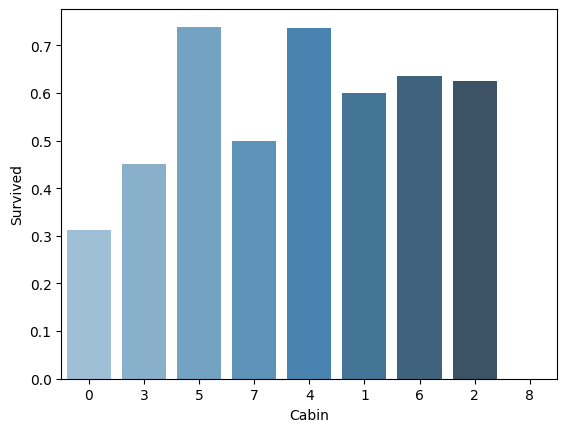

In [19]:
sns.barplot(x="Cabin", y="Survived", data=treino,
            label="Cabine vs Taxa de sobrevivência",palette="Blues_d", ci= None)

### 4.2 Titulo / Sobrevivência

<AxesSubplot: xlabel='Titulo', ylabel='Survived'>

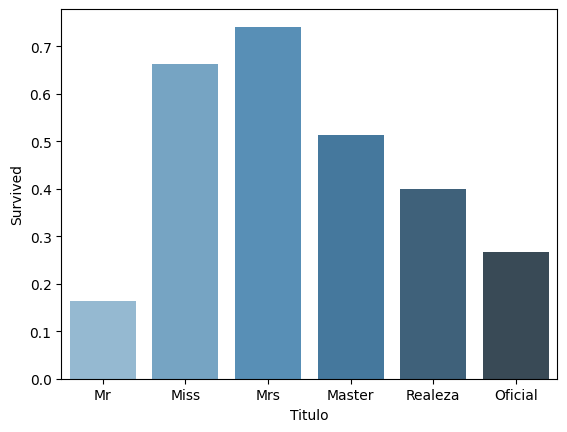

In [20]:
sns.barplot(x= treino['Titulo'] , y=treino['Survived'], palette="Blues_d", ci= None)

### 4.2 Sexo importa

Text(0.5, 1.0, 'Sex vs Sozinho comparação de sobrevivência')

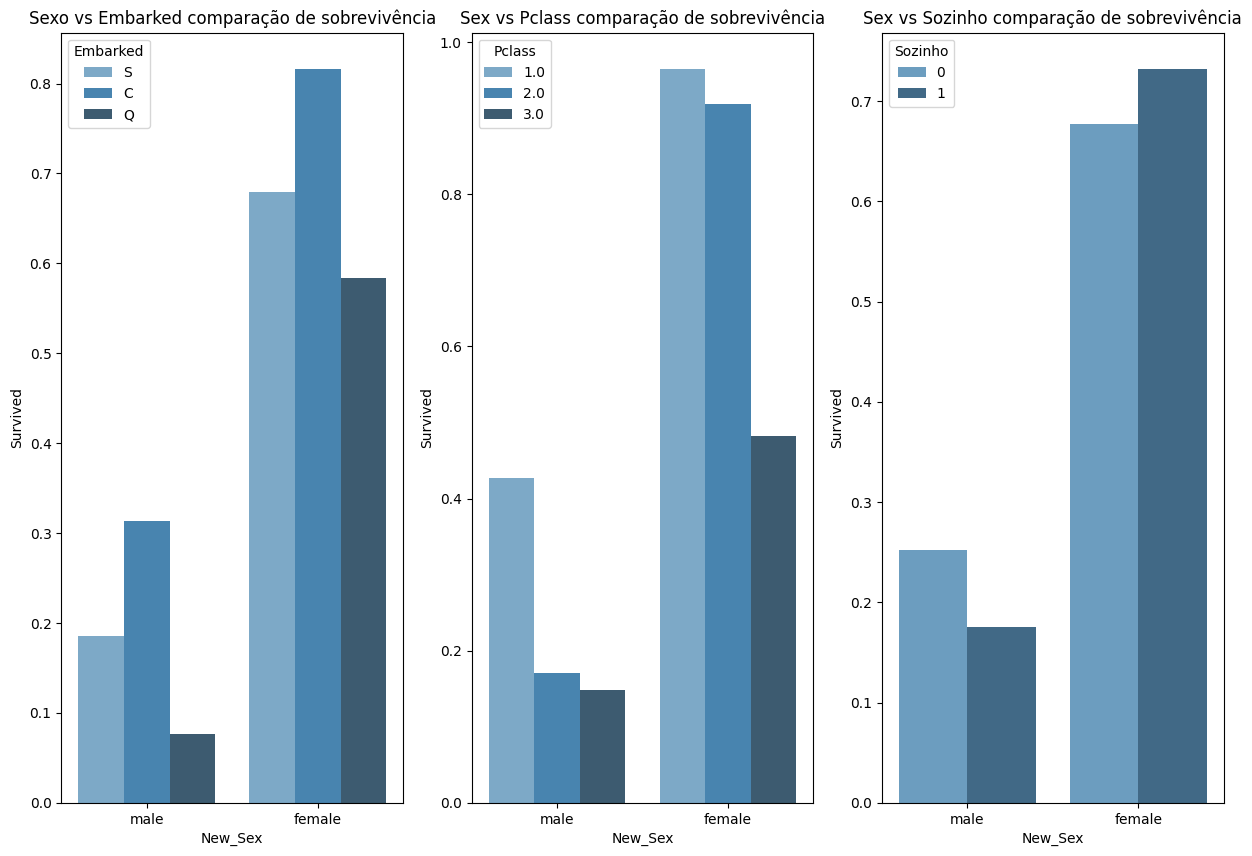

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10))

sns.barplot(x = 'New_Sex', y = 'Survived', hue = 'Embarked', palette="Blues_d", data=treino, ax = ax1, ci= None)
ax1.set_title('Sexo vs Embarked comparação de sobrevivência')

sns.barplot(x = 'New_Sex', y = 'Survived', hue = 'Pclass',palette="Blues_d", data=treino, ax  =  ax2, ci= None)
ax2.set_title('Sex vs Pclass comparação de sobrevivência')

sns.barplot(x = 'New_Sex', y = 'Survived', hue = 'Sozinho',palette="Blues_d", data=treino, ax  = ax3, ci= None)
ax3.set_title('Sex vs Sozinho comparação de sobrevivência')

### 4.3 Estar sozinho é melhor do que com família?

Podemos observar com este gráfico que mulheres com mais de 3 familiares na embarcação tendem a menor chance de sobrevivência, assim como homens sozinhos e com até 3 familiares tendem a maior chance de sobrevivência.

<AxesSubplot: xlabel='Family', ylabel='Survived'>

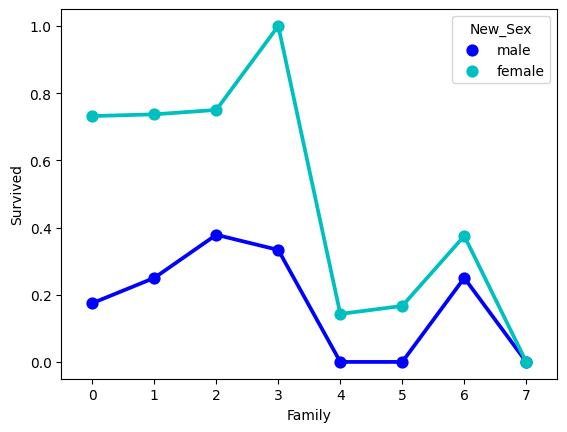

In [22]:
sns.pointplot(x="Family", y="Survived", hue="New_Sex", data=treino, palette={"male": "blue", "female": "c"}, ci=None)

### 4.4 Idade

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

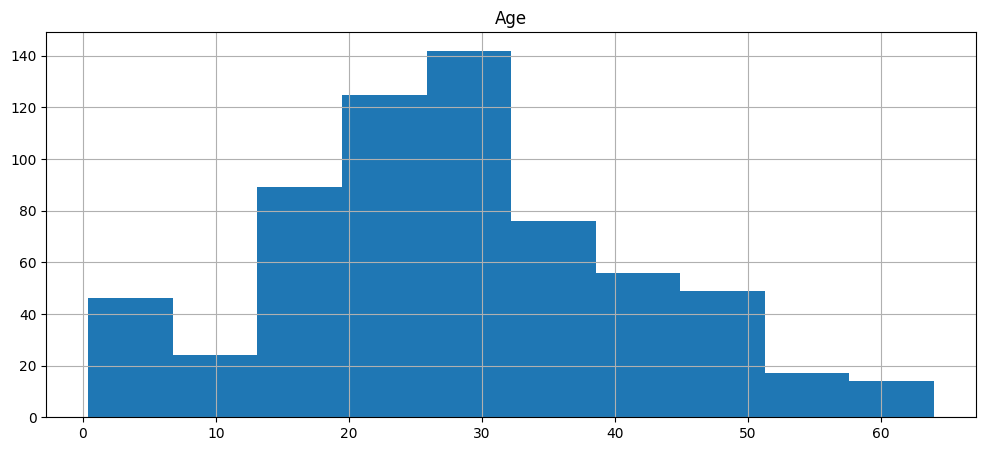

In [23]:
treino.hist(column='Age', figsize = (12,5))

/home/barauna/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/barauna/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


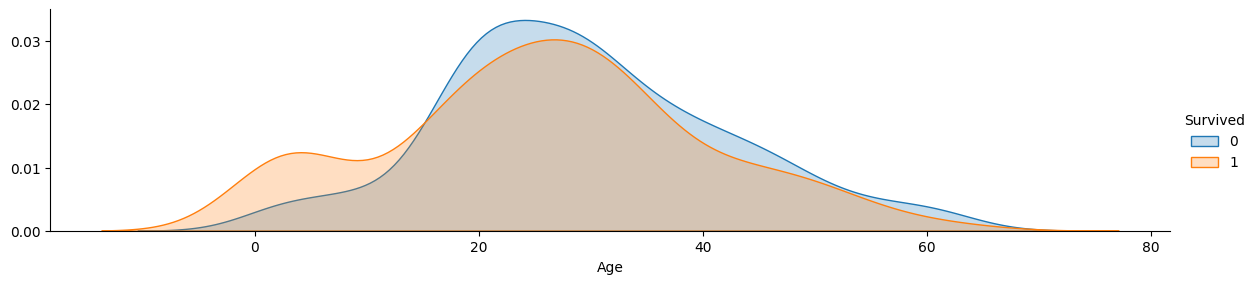

In [24]:
facet = sns.FacetGrid(treino, hue="Survived",aspect=4, height  = 3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.add_legend()

## 5 Transformações
Em 1959, Arthur Samuel definiu aprendizado de máquina como o "campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados." Existem três principais categorias para o aprendizado da máquina: aprendizagem supervisionada, não supervisionada e por reforço. Usaremos, neste caso, o aprendizado supervisionado.
Problemas de aprendizagem supervisionada são classificados em problemas de “regressão” e “classificação”. Em um problema de classificação estamos tentando prever os resultados em uma saída discreta. Em outras palavras, estamos procurando mapear variáveis de entrada em categorias distintas.Para que o algoritmo funcione da melhor maneira serão feitos simples reparos, criadas e transformadas colunas.

### 5.1 Covertendo colunas para valores numéricos

Nesta seção transformaremos as colunas 'New_sex', 'Embarked' e 'Tem_Cabine' para valores numéricos, faremos com que elas e as colunas 'Titulo' e 'Pclass' se tornem colunas distintas para cada resposta possível, e que os únicos valores sejam 1 e 0, representando "Sim" ou "Não", "True" ou "False".

In [25]:
#Transformaremos a coluna sexo para Masculino: 0 e Feminino:1
mapeamento_sexo = {'male': 0, 'female':1}
treino['New_Sex'] = treino['New_Sex'].map(mapeamento_sexo)
teste['Sex'] = teste['Sex'].map(mapeamento_sexo)

In [26]:
#Transformação usando a funcão 'get_dummies' que nos dará uma coluna para cada valor único em cada coluna
treino = pd.get_dummies(treino, columns=['Embarked'])
teste = pd.get_dummies(teste, columns=['Embarked'])
treino = pd.get_dummies(treino, columns=['Pclass'])
teste = pd.get_dummies(teste, columns=['Pclass'])
treino = pd.get_dummies(treino, columns=['Titulo'])
teste = pd.get_dummies(teste, columns=['Titulo'])
#treino = pd.get_dummies(treino, columns=['Tem_Cabine'])
#teste = pd.get_dummies(teste, columns=['Tem_Cabine'])


treino.head()

,Passengerid,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,New_Sex,...,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Oficial,Titulo_Realeza
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,...,1,0,0,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",women,26.0,0,0,7.9250,0,1,...,1,0,0,1,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,53.1000,3,1,...,1,1,0,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,...,1,0,0,1,0,0,1,0,0,0
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,5,0,...,1,1,0,0,0,0,1,0,0,0


In [27]:
teste.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Family', 'Sozinho', 'Pequena_familia', 'Grande_familia', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Titulo_Col', 'Titulo_Dr', 'Titulo_Master', 'Titulo_Miss', 'Titulo_Mr',
       'Titulo_Mrs', 'Titulo_Rev'],
      dtype='object')

In [28]:
treino.columns

Index(['Passengerid', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Fare', 'Cabin', 'New_Sex', 'Family', 'Sozinho', 'Pequena_familia',
       'Grande_familia', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1.0', 'Pclass_2.0', 'Pclass_3.0', 'Titulo_Master',
       'Titulo_Miss', 'Titulo_Mr', 'Titulo_Mrs', 'Titulo_Oficial',
       'Titulo_Realeza'],
      dtype='object')

### 5.2 Renomeando colunas

Renomearemos algumas colunas nescessárias para o uso do algoritmo.

In [29]:
teste = teste.rename(columns={'Sex': 'New_Sex'})
treino = treino.rename(columns ={'Sibsp': 'SibSp','Pclass_1.0':'Pclass_1','Pclass_2.0':'Pclass_2', 'Pclass_3.0':'Pclass_3'})
treino.head()

,Passengerid,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,New_Sex,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Oficial,Titulo_Realeza
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,...,1,0,0,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",women,26.0,0,0,7.9250,0,1,...,1,0,0,1,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,53.1000,3,1,...,1,1,0,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,...,1,0,0,1,0,0,1,0,0,0
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,5,0,...,1,1,0,0,0,0,1,0,0,0


In [30]:
#Precisarei transformar meus valores em tipo 'Float' para classificação.
treino = treino.astype({'New_Sex': float, 'Embarked_C': float, 'Embarked_Q': float, 'Embarked_S': float, 'Pclass_1': float,
                        'Pclass_2': float,'Pclass_3': float,'Sozinho': float,'Pequena_familia': float,'Grande_familia': float,
                        'Titulo_Master': float,'Titulo_Miss': float,'Titulo_Mrs': float,'Titulo_Mr': float,
                        'Cabin': float })
teste = teste.astype({'New_Sex': float, 'Embarked_C': float, 'Embarked_Q': float, 'Embarked_S': float, 'Pclass_1': float,
                        'Pclass_2': float,'Pclass_3': float,'Sozinho': float,'Pequena_familia': float,'Grande_familia': float,
                        'Titulo_Master': float,'Titulo_Miss': float,'Titulo_Mrs': float,'Titulo_Mr': float,
                        'Cabin': float })

In [31]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 935
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passengerid      638 non-null    int64  
 1   Survived         638 non-null    int64  
 2   Name             638 non-null    object 
 3   Sex              606 non-null    object 
 4   Age              638 non-null    float64
 5   SibSp            638 non-null    int64  
 6   Parch            638 non-null    int64  
 7   Fare             638 non-null    float64
 8   Cabin            638 non-null    float64
 9   New_Sex          638 non-null    float64
 10  Family           638 non-null    int64  
 11  Sozinho          638 non-null    float64
 12  Pequena_familia  638 non-null    float64
 13  Grande_familia   638 non-null    float64
 14  Embarked_C       638 non-null    float64
 15  Embarked_Q       638 non-null    float64
 16  Embarked_S       638 non-null    float64
 17  Pclass_1        

## 6 Aplicação do algoritmo

Por ser um algoritmo que trabalha bem com várias categorias, ser conhecido por não possuir muito overfit e por trabalhar bem com atributos de diferentes escalas foi escolhido o Random Forest (floresta aleatória). Aplicaremos o algoritmo e o testaremos tentando descobrir o próprio conjunto de dados do arquivo Treino, e assim verificar se a sua saída condiz com a realidade.

Uma ótima maneira de analisar o projeto é observar a importância de cada coluna para o resultado final do algoritmo, então plotaremos um gráfico de barras para verificar se a importância de cada coluna condiz com as informações que temos e aprender mais sobre o conjunto de dados.

Para auxiliar na escolha do modelo usaremos a Matriz de Confusão; um layout que permite a visualização do desempenho de um algoritmo, podendo nos dar 4 métricas importantes para qualquer modelo de aprendizado da máquina:
- Precisão 
- Acurácia
- Recall
- F1 Score

### 6.1 Todas Características

Antes de rodar nosso algoritmo com o arquivo Teste, faremos algumas tentativas com o própio arquivo Treino.
Primeiramente usaremos a função 'train_test_split()' do sklearn, que faz com que o arquivo seja dividido em 70% do conjunto de dados para realmente treinar o algoritmo e 30% desse conjunto para testá-lo.
Por já possuir os resultados deste arquivo, conseguiremos medir acurácia, precisão, recall e pontuação de F1, essas 4 características irão ajudar a 'afinar' o algoritmo.

In [32]:
x_treino=treino[['Age', 'Fare', 'New_Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']]
y_treino=treino['Survived']
x_teste=treino[['Age', 'Fare', 'New_Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                'Cabin']]

x_treino, X_teste_A, y_treino, Y_teste_A = train_test_split(treino[['Age', 'Fare', 'New_Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']], treino['Survived'], random_state=1, test_size=0.3)
#Algoritmo de Floresta aleatória
rnf_A=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_A.fit(x_treino,y_treino)

y_prever_rnf_A = rnf_A.predict(X_teste_A)

#Pontuação do algoritmo
print(rnf_A.score(x_treino,y_treino))

print('Accuracy score: {}'.format(accuracy_score(Y_teste_A, y_prever_rnf_A)))
print('Precision score: {}'.format(precision_score(Y_teste_A, y_prever_rnf_A)))
print('Recall score: {}'.format(recall_score(Y_teste_A, y_prever_rnf_A)))
print('F1 score: {}'.format(f1_score(Y_teste_A, y_prever_rnf_A)))

0.9932735426008968
Accuracy score: 0.828125
Precision score: 0.8
Recall score: 0.7466666666666667
F1 score: 0.7724137931034483


[0.25226399 0.24202262 0.10624891 0.0092589  0.00504657 0.01124128
 0.01623318 0.02123463 0.03357692 0.01629787 0.03804244 0.02907761
 0.01240079 0.02248306 0.0260166  0.10862763 0.04992701]
    Importancia          Colunas
0      0.252264              Age
1      0.242023             Fare
2      0.106249          New_Sex
3      0.009259       Embarked_C
4      0.005047       Embarked_Q
5      0.011241       Embarked_S
6      0.016233         Pclass_1
7      0.021235         Pclass_2
8      0.033577         Pclass_3
9      0.016298          Sozinho
10     0.038042  Pequena_familia
11     0.029078   Grande_familia
12     0.012401    Titulo_Master
13     0.022483      Titulo_Miss
14     0.026017       Titulo_Mrs
15     0.108628        Titulo_Mr
16     0.049927            Cabin


<AxesSubplot: xlabel='Importancia', ylabel='Colunas'>

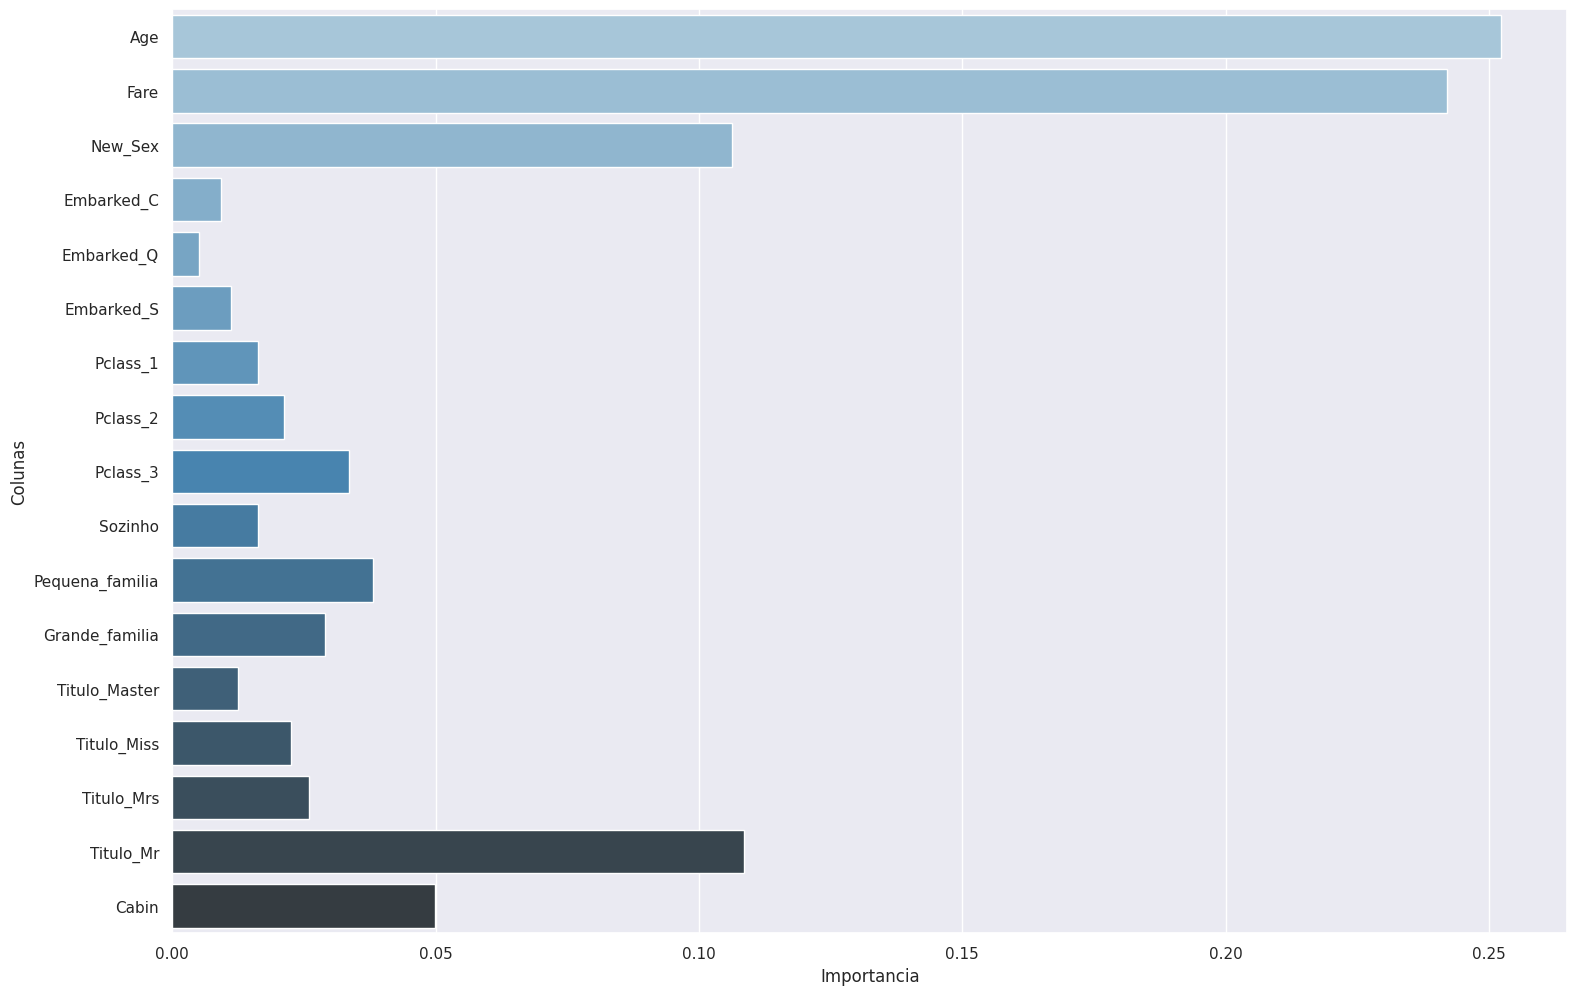

In [33]:
importancia = rnf_A.feature_importances_
print(importancia)
testeimpo_A = pd.DataFrame ({'Importancia':importancia,'Colunas':x_treino.columns})
print(testeimpo_A)
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x=testeimpo_A['Importancia'],y=testeimpo_A['Colunas'],palette="Blues_d")

In [34]:
conf_matrix_A = confusion_matrix(Y_teste_A, y_prever_rnf_A)
print(pd.crosstab(Y_teste_A, y_prever_rnf_A, rownames=['Real'],
                  colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        103  14  117
1         19  56   75
All      122  70  192


### 6.2 Top 8

Podemos ver no gráfico acima quais foram as colunas com maior importância no modelo anterior, então selecionando essas 8 variáveis é possível tentar manter ou melhorar a acurácia com menor número de colunas.

In [35]:
# Colunas para cada varíavel de teste/ Top 8
x_treino=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Titulo_Miss','Titulo_Mrs', 'Cabin']]
y_treino=treino['Survived']
x_teste=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Titulo_Miss','Titulo_Mrs', 'Cabin']]

x_treino, X_teste_8, y_treino, Y_teste_8 = train_test_split(treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Titulo_Miss','Titulo_Mrs', 'Cabin']], treino['Survived'], random_state=1, test_size= 0.3)
#Algoritmo de Floresta aleatória
rnf_8=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_8.fit(x_treino,y_treino)

#Predição do algoritmo
y_prever_rnf_8 = rnf_8.predict(X_teste_8)

#Pontuação do algoritmo
print(rnf_8.score(x_treino,y_treino))

print('Accuracy score: {}'.format(accuracy_score(Y_teste_8, y_prever_rnf_8)))
print('Precision score: {}'.format(precision_score(Y_teste_8, y_prever_rnf_8)))
print('Recall score: {}'.format(recall_score(Y_teste_8, y_prever_rnf_8)))
print('F1 score: {}'.format(f1_score(Y_teste_8, y_prever_rnf_8)))

0.9910313901345291
Accuracy score: 0.8125
Precision score: 0.76
Recall score: 0.76
F1 score: 0.76


[0.28973144 0.30334339 0.09882859 0.06600166 0.10933973 0.02434182
 0.0414655  0.06694787]
   Importancia      Colunas
0     0.289731          Age
1     0.303343         Fare
2     0.098829      New_Sex
3     0.066002     Pclass_3
4     0.109340    Titulo_Mr
5     0.024342  Titulo_Miss
6     0.041466   Titulo_Mrs
7     0.066948        Cabin


<AxesSubplot: xlabel='Importancia', ylabel='Colunas'>

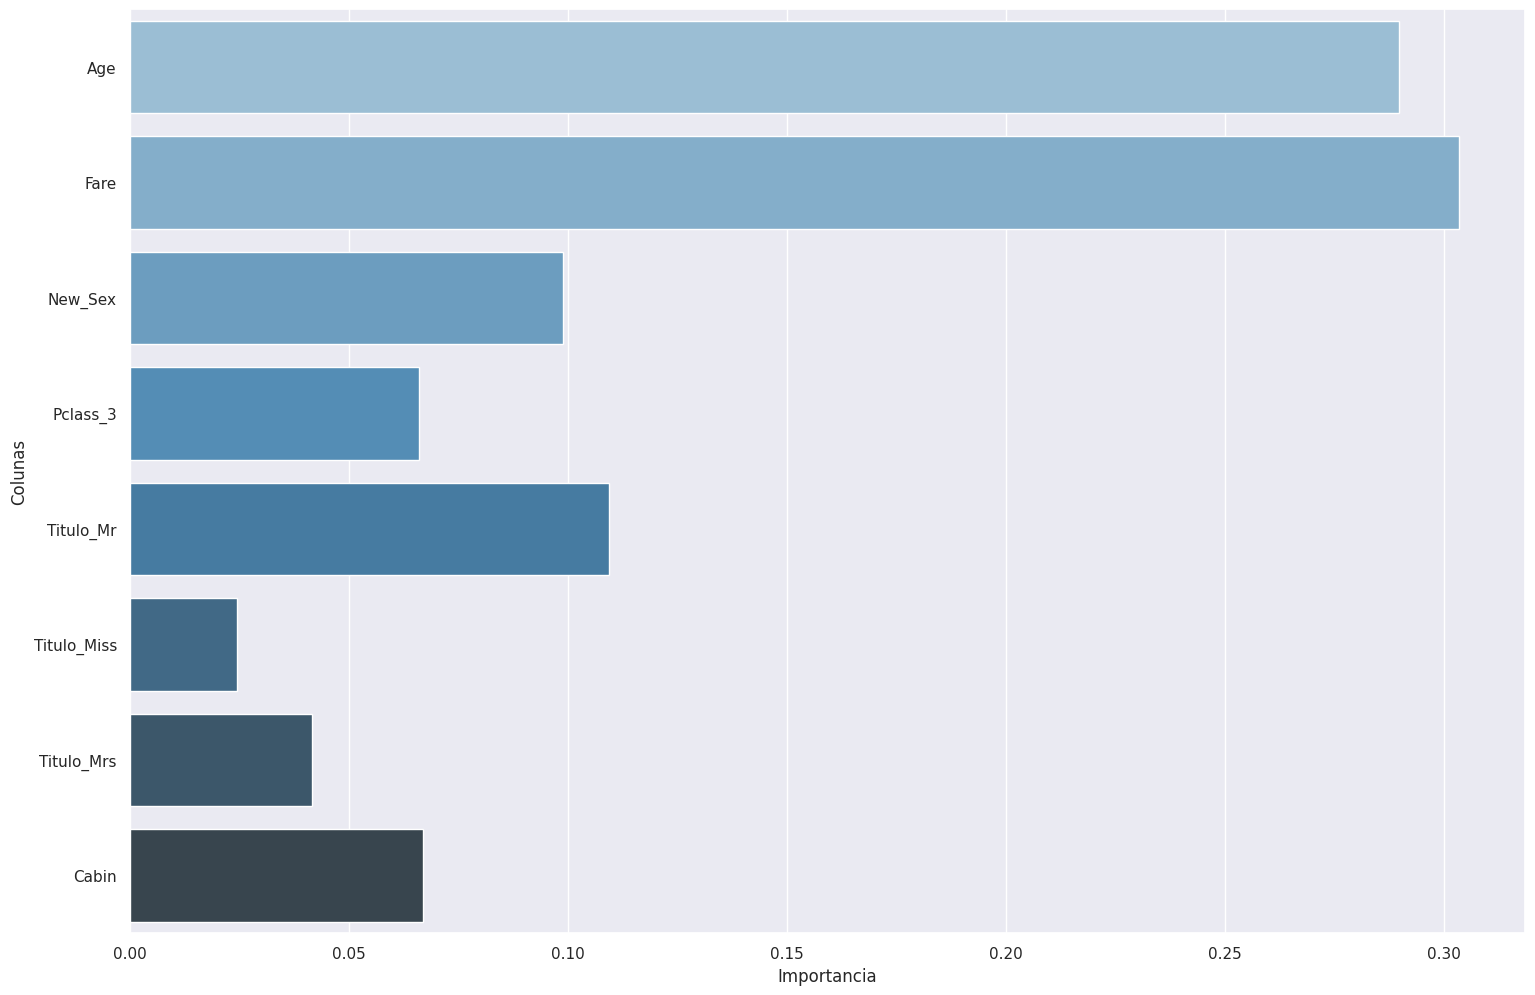

In [36]:
importancia_8 = rnf_8.feature_importances_
print(importancia_8)
testeimpo_8 = pd.DataFrame ({'Importancia':importancia_8,'Colunas':x_treino.columns})
print(testeimpo_8)
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x=testeimpo_8['Importancia'],y=testeimpo_8['Colunas'],palette="Blues_d")

In [37]:
conf_matrix_8 = confusion_matrix(Y_teste_8, y_prever_rnf_8)
print(pd.crosstab(Y_teste_8, y_prever_rnf_8, rownames=['Real'],
                  colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         99  18  117
1         18  57   75
All      117  75  192


### 6.3 Top 6

Tentaremos agora utilizar as 6 categorias mais importantes.

In [38]:
# Colunas para cada varíavel de teste/ Top 6
x_treino=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Cabin']]
y_treino=treino['Survived']
x_teste=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Cabin']]

x_treino, X_teste_6, y_treino, Y_teste_6 = train_test_split(treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Cabin']], treino['Survived'], random_state=1)

#Algoritmo de Floresta aleatória
rnf_6=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_6.fit(x_treino,y_treino)

#Predição do algoritmo
y_prever_rnf_6 = rnf_6.predict(X_teste_6)

#Pontuação do algoritmo
print(rnf_6.score(x_treino,y_treino))

print('Accuracy score: {}'.format(accuracy_score(Y_teste_6, y_prever_rnf_6)))
print('Precision score: {}'.format(precision_score(Y_teste_6, y_prever_rnf_6)))
print('Recall score: {}'.format(recall_score(Y_teste_6, y_prever_rnf_6)))
print('F1 score: {}'.format(f1_score(Y_teste_6, y_prever_rnf_6)))

0.9874476987447699
Accuracy score: 0.83125
Precision score: 0.7931034482758621
Recall score: 0.7540983606557377
F1 score: 0.7731092436974789


[0.31788082 0.30805362 0.12190969 0.06938684 0.12732816 0.05544087]
   Importancia    Colunas
0     0.317881        Age
1     0.308054       Fare
2     0.121910    New_Sex
3     0.069387   Pclass_3
4     0.127328  Titulo_Mr
5     0.055441      Cabin


<AxesSubplot: xlabel='Importancia', ylabel='Colunas'>

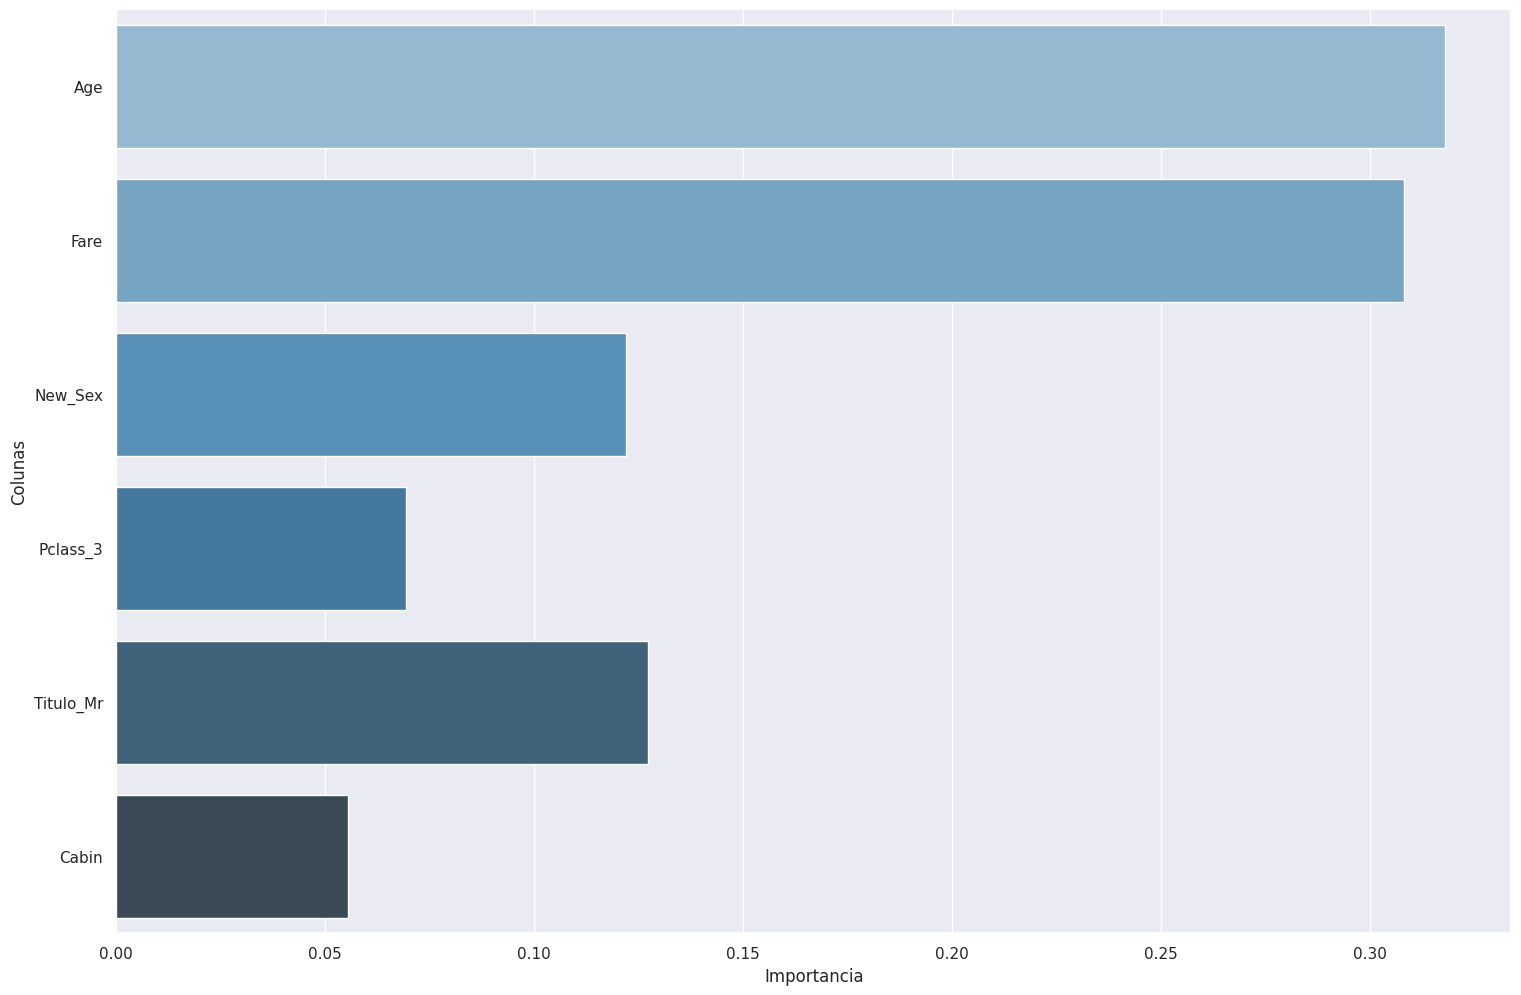

In [39]:
importancia_6 = rnf_6.feature_importances_
print(importancia_6)
testeimpo_6 = pd.DataFrame ({'Importancia':importancia_6,'Colunas':x_treino.columns})
print(testeimpo_6)
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x=testeimpo_6['Importancia'],y=testeimpo_6['Colunas'],palette="Blues_d")

In [40]:
conf_matrix_6 = confusion_matrix(Y_teste_6, y_prever_rnf_6)
print(pd.crosstab(Y_teste_6, y_prever_rnf_6, rownames=['Real'],
                  colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         87  12   99
1         15  46   61
All      102  58  160


### 6.4 Teste maior modelo contra ele mesmo

Nesta seção e na que segue testaremos o modelo com todas as características e o modelo Top 8. Os treinaremos com o modelo inteiro e os testaremos procurando prever a própia coluna _'Survived'_.
O objetivo deste teste é ter maior análise dos modelos e testar a sua probabilidade de estar _overfit_.

In [41]:
# Colunas para cada varíavel de treino teste final
x_treino_T=treino[['Age', 'Fare', 'New_Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']]
y_treino_T=treino['Survived']
x_teste_T=treino[['Age', 'Fare', 'New_Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']]

#Algoritmo de Floresta aleatória
rnf_T=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_T.fit(x_treino_T, y_treino_T)

#Predição do algoritmo
y_prever_rnf_T = rnf_T.predict(x_teste_T)

#Pontuação do algoritmo
print(rnf_T.score(x_treino_T,y_treino_T))

print('Accuracy score: {}'.format(accuracy_score(y_treino_T, y_prever_rnf_T)))
print('Precision score: {}'.format(precision_score(y_treino_T, y_prever_rnf_T)))
print('Recall score: {}'.format(recall_score(y_treino_T, y_prever_rnf_T)))
print('F1 score: {}'.format(f1_score(y_treino_T, y_prever_rnf_T)))

0.9905956112852664
Accuracy score: 0.9905956112852664
Precision score: 0.9956140350877193
Recall score: 0.978448275862069
F1 score: 0.9869565217391305


In [42]:
print(pd.crosstab(y_treino_T, y_prever_rnf_T, rownames=['Real'],
                  colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        405    1  406
1          5  227  232
All      410  228  638


### 6.5 Teste Top 8 contra ele mesmo

In [43]:
# Colunas para cada varíavel de treino teste final
x_treino_T8=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Titulo_Miss','Titulo_Mrs', 'Cabin']]
y_treino_T8=treino['Survived']
x_teste_T8=treino[['Age', 'Fare', 'New_Sex','Pclass_3',
                 'Titulo_Mr','Titulo_Miss','Titulo_Mrs', 'Cabin']]

#Algoritmo de Floresta aleatória
rnf_T8=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_T8.fit(x_treino_T8, y_treino_T8)

#Predição do algoritmo
y_prever_rnf_T8 = rnf_T8.predict(x_teste_T8)

#Pontuação do algoritmo
print(rnf_T8.score(x_treino_T8,y_treino_T8))

print('Accuracy score: {}'.format(accuracy_score(y_treino_T8, y_prever_rnf_T8)))
print('Precision score: {}'.format(precision_score(y_treino_T8, y_prever_rnf_T8)))
print('Recall score: {}'.format(recall_score(y_treino_T8, y_prever_rnf_T8)))
print('F1 score: {}'.format(f1_score(y_treino_T8, y_prever_rnf_T8)))

0.9890282131661442
Accuracy score: 0.9890282131661442
Precision score: 0.9955947136563876
Recall score: 0.9741379310344828
F1 score: 0.9847494553376905


In [44]:
print(pd.crosstab(y_treino_T8, y_prever_rnf_T8, rownames=['Real'],
                  colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        405    1  406
1          6  226  232
All      411  227  638


### 6.6 Modelo Final

In [45]:
# Colunas para cada varíavel do modelo final
x_treino_F=treino[['Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']]
y_treino_F=treino['Survived']
x_teste_F=teste[['Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Pclass_2','Pclass_3',
                 'Sozinho','Pequena_familia','Grande_familia','Titulo_Master','Titulo_Miss','Titulo_Mrs','Titulo_Mr',
                 'Cabin']]

#Algoritmo de Floresta aleatória
rnf_F=RandomForestClassifier()

#Aprendizado do algoritmo
rnf_F.fit(x_treino_F, y_treino_F)

#Predição do algoritmo
y_prever_rnf_F = rnf_F.predict(x_teste_F)

#Pontuação do algoritmo
print(rnf_F.score(x_treino_F, y_treino_F))

0.9905956112852664


In [46]:
df_teste_rnf = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": y_prever_rnf_F
         })

## 7 Conclusão

Nestre trabalho foi realizada a limpeza, correção e transformação de dados. Foi feito remoção de outliers e preenchimento de dados faltantes para melhor análise posterior. Na construção do modelo também foi avaliada a seleção de features, realizado um top 8 e top 6 para poder, em um futuro, nos dar um melhor retorno com maior número de dados.
Análisando o gráfico 4.1 percebemos o quanto a localização das cabines influencia na taxa de sobrevivência. Percebemos com o gráfico 4.2 que as mulheres, não importando idade ou localização, tinham chances muito maiores de sobrevivência do que os homems. De acordo com o segundo gráfico do 4.4 observamos a faixa etária com maior chance de sobrevivência.

## 8 Referências
- [RMS Titanic](https://pt.wikipedia.org/wiki/RMS_Titanic).
- [Botes salva-vidas do RMS Titanic](https://pt.wikipedia.org/wiki/Botes_salva-vidas_do_RMS_Titanic).
- [Titanic by History](https://www.history.com/topics/early-20th-century-us/titanic).